<a href="https://colab.research.google.com/github/KJ-7/DemoRepo2/blob/master/Kevine_Shima_Python_Coding_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and PreProcessing


In [ ]:
# Import Relevant Libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import skew
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt


Data Ingestion

In [ ]:
# Load the dataset
healthcare_data = pd.read_csv("Beckersdata.csv")

In [ ]:
# Check if the dataset contains any duplicated row
healthcare_data.duplicated().unique()

array([False])

There are no duplicated rows in the dataset

In [ ]:
# Load the first 5 rows of the dataset
healthcare_data.head()

,Hospital Name,Firm Type_x,Hospital Type_x,Address_x,Address1,City_x,State_x,Definitive ID_x,Provider Number,# of Staffed Beds,...,Location Phone,Definitive ID_y,Firm Type_y,Hospital Type_y,Address_y,Address Line 2,City_y,State_y,Region,Revenue Per Bed
0,4C Health (AKA Four County Counseling Center),Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,4987,154035,16.0,...,574.722.5151,4987,Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,Midwest,1735759.25
1,4C Health (AKA Four County Counseling Center),Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,4987,154035,16.0,...,574.722.5151,4987,Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,Midwest,1735759.25
2,4C Health (AKA Four County Counseling Center),Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,4987,154035,16.0,...,574.722.5151,4987,Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,Midwest,1735759.25
3,4C Health (AKA Four County Counseling Center),Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,4987,154035,16.0,...,574.722.5151,4987,Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,Midwest,1735759.25
4,4C Health (AKA Four County Counseling Center),Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,4987,154035,16.0,...,574.722.5151,4987,Hospital,Psychiatric Hospital,1015 Michigan Ave,Missing,Logansport,IN,Midwest,1735759.25


In [ ]:
# Check number of columns and rows of this dataset
healthcare_data.shape

(204747, 29)

In [ ]:
# Check number of missing values in each feature
healthcare_data.isnull().sum()

Hospital Name              0
Firm Type_x                0
Hospital Type_x            0
Address_x                  0
Address1                   0
City_x                     0
State_x                    0
Definitive ID_x            0
Provider Number            0
# of Staffed Beds          0
Fiscal Year End Date       0
Net Patient Revenue        0
Total Revenues             0
Definitive Executive ID    0
Executive Name             0
Title                      0
Standardized Title         0
Email                      0
Direct Phone               0
Location Phone             0
Definitive ID_y            0
Firm Type_y                0
Hospital Type_y            0
Address_y                  0
Address Line 2             0
City_y                     0
State_y                    0
Region                     0
Revenue Per Bed            0
dtype: int64

In [ ]:
# Columns with missing values
columns_with_missing = healthcare_data.columns[healthcare_data.isnull().any()]
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Index(['Address1', 'Provider Number', '# of Staffed Beds',
       'Fiscal Year End Date', 'Net Patient Revenue', 'Total Revenues',
       'Email', 'Direct Phone', 'Location Phone', 'Address Line 2'],
      dtype='object')


In [ ]:
# Filling categorical variables with specific value to give information that the values were missing

healthcare_data = healthcare_data.fillna({'Fiscal Year End Date':'Missing',
                  'Address Line 2':'Missing',
                   'Location Phone':'Missing',
                   'Direct Phone':'Missing',
                   'Email':'Missing',
                   'Address1':'Missing',
                   'Provider Number':'Missing'})

Since the variables above are categorical, missing variables are replaced by  a specific value - "Missing"

In [ ]:
# To check if missing values have reduced from the changes made above
healthcare_data.isnull().sum()

Hospital Name              0
Firm Type_x                0
Hospital Type_x            0
Address_x                  0
Address1                   0
City_x                     0
State_x                    0
Definitive ID_x            0
Provider Number            0
# of Staffed Beds          0
Fiscal Year End Date       0
Net Patient Revenue        0
Total Revenues             0
Definitive Executive ID    0
Executive Name             0
Title                      0
Standardized Title         0
Email                      0
Direct Phone               0
Location Phone             0
Definitive ID_y            0
Firm Type_y                0
Hospital Type_y            0
Address_y                  0
Address Line 2             0
City_y                     0
State_y                    0
Region                     0
Revenue Per Bed            0
dtype: int64


Changes have been made; categorical variables have no missing values

In [ ]:
healthcare_data.isnull().sum().sum()

0

# Data Transformation

Null Imputation for Numerical Features


In [ ]:
# Check the data types of features in a dataset
healthcare_data.dtypes

Hospital Name              object
Firm Type_x                object
Hospital Type_x            object
Address_x                  object
Address1                   object
City_x                     object
State_x                    object
Definitive ID_x             int64
Provider Number            object
# of Staffed Beds          object
Fiscal Year End Date       object
Net Patient Revenue        object
Total Revenues             object
Definitive Executive ID     int64
Executive Name             object
Title                      object
Standardized Title         object
Email                      object
Direct Phone               object
Location Phone             object
Definitive ID_y             int64
Firm Type_y                object
Hospital Type_y            object
Address_y                  object
Address Line 2             object
City_y                     object
State_y                    object
Region                     object
dtype: object

In [ ]:
# Function to clean the column and convert to float
def clean_col(value):
    try:
        # Remove symbols like '$', ',', '%', etc.
        value = str(value).replace(',', '').replace('$', '').replace('%', '')
        # Convert to float
        return float(value)
    except ValueError:
        # Handle invalid conversion, replace with NaN
        return np.nan

# Apply function clean_col to clean three columns: # of Staffed Beds, Net Patient Revenue, Total Revenues

healthcare_data['# of Staffed Beds'] = healthcare_data['# of Staffed Beds'].apply(clean_col)
healthcare_data['Net Patient Revenue'] = healthcare_data['Net Patient Revenue'].apply(clean_col)
healthcare_data['Total Revenues'] = healthcare_data['Total Revenues'].apply(clean_col)


In [ ]:
# Check features datatypes
healthcare_data.dtypes

Hospital Name               object
Firm Type_x                 object
Hospital Type_x             object
Address_x                   object
Address1                    object
City_x                      object
State_x                     object
Definitive ID_x              int64
Provider Number             object
# of Staffed Beds          float64
Fiscal Year End Date        object
Net Patient Revenue        float64
Total Revenues             float64
Definitive Executive ID      int64
Executive Name              object
Title                       object
Standardized Title          object
Email                       object
Direct Phone                object
Location Phone              object
Definitive ID_y              int64
Firm Type_y                 object
Hospital Type_y             object
Address_y                   object
Address Line 2              object
City_y                      object
State_y                     object
Region                      object
dtype: object

Check the skewness to determine the replacement value for missing values in numerical features

In [ ]:
skewness = healthcare_data['# of Staffed Beds'].skew()

print(skewness)

4.396130096475621


In [ ]:
skewness = healthcare_data['Net Patient Revenue'].skew()

print(skewness)

4.116841565048455


In [ ]:
skewness = healthcare_data['Total Revenues'].skew()

print(skewness)

3.96469926257138


Since skewness is greater than 0, it is better to use median to replace missing values in numerical values

In [ ]:
# List of columns to impute
columns_with_missing = ['# of Staffed Beds', 'Net Patient Revenue', 'Total Revenues']

 # Perform median imputation
for col in columns_with_missing:
    median_value = healthcare_data[col].median()
    healthcare_data[col].fillna(median_value, inplace=True)

In [ ]:
healthcare_data.isnull().sum()

Hospital Name              0
Firm Type_x                0
Hospital Type_x            0
Address_x                  0
Address1                   0
City_x                     0
State_x                    0
Definitive ID_x            0
Provider Number            0
# of Staffed Beds          0
Fiscal Year End Date       0
Net Patient Revenue        0
Total Revenues             0
Definitive Executive ID    0
Executive Name             0
Title                      0
Standardized Title         0
Email                      0
Direct Phone               0
Location Phone             0
Definitive ID_y            0
Firm Type_y                0
Hospital Type_y            0
Address_y                  0
Address Line 2             0
City_y                     0
State_y                    0
Region                     0
dtype: int64

In [ ]:
# Creating a new column Revenue Per Bed and accounting for when # of Staffed Beds is equal to 0
healthcare_data['Revenue Per Bed'] = healthcare_data.apply(lambda row: row['Net Patient Revenue'] / row['# of Staffed Beds'] if row['# of Staffed Beds'] != 0 else None, axis=1)


In [ ]:
# Check if the # of Staffed Beds has 0 value
healthcare_data[healthcare_data['# of Staffed Beds']== 0]


,Hospital Name,Firm Type_x,Hospital Type_x,Address_x,Address1,City_x,State_x,Definitive ID_x,Provider Number,# of Staffed Beds,...,Location Phone,Definitive ID_y,Firm Type_y,Hospital Type_y,Address_y,Address Line 2,City_y,State_y,Region,Revenue Per Bed


The number of Staffed Beds column has no 0 as a value

# Data Analysis

In [ ]:
# Top 10 hospitals with the highest "Net Patient Revenue"
Top10 = healthcare_data.nlargest(10, 'Net Patient Revenue')
displayed_columns = ['Hospital Name','City_x', 'State_x','Net Patient Revenue']
print(Top10[displayed_columns])

                                           Hospital Name     City_x State_x  \
68485  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68486  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68487  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68488  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68489  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68490  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68491  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68492  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68493  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   
68494  HCA Healthcare (FKA Hospital Corporation of Am...  Nashville      TN   

       Net Patient Revenue  
68485         5.138422e+10  
68486         5.138422e+10  
68487         5.138422e+10  
68488         

In [ ]:
# Print the average number of staffed beds for each hospital

StaffedBedsAvg = healthcare_data.groupby('Hospital Type_x')['# of Staffed Beds'].mean().astype(int)

print(StaffedBedsAvg)

Hospital Type_x
Childrens Hospital                                339
Critical Access Hospital                           22
Department of Defense Hospital                    213
Health System                                    4432
Long Term Acute Care Hospital                     114
Psychiatric Hospital                              170
Rehabilitation Hospital                           175
Religious Non-Medical Health Care Institution      14
Short Term Acute Care Hospital                    296
VA Hospital                                       218
Name: # of Staffed Beds, dtype: int64


# Data Visualization

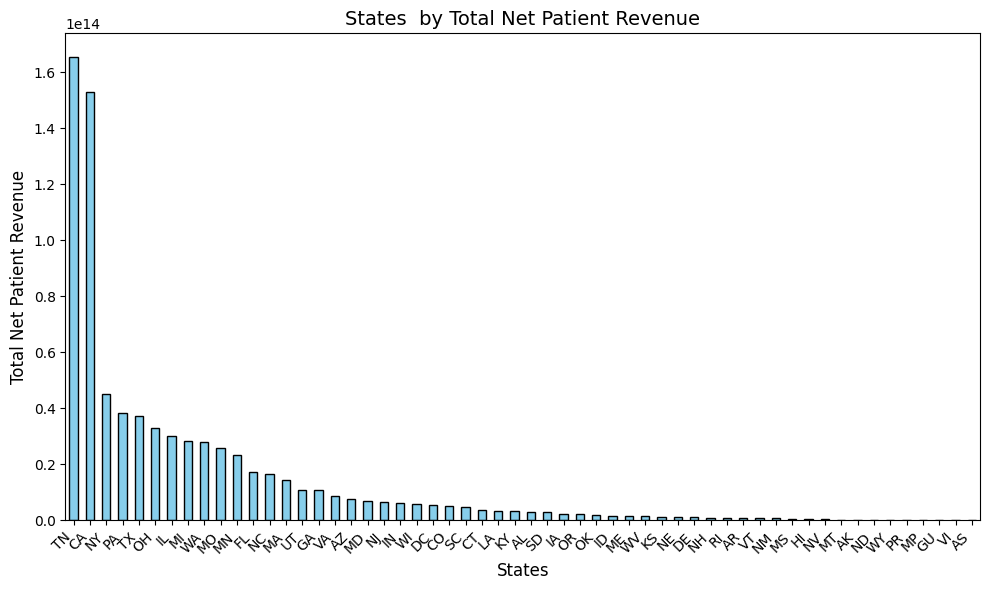

In [ ]:
# Creating a bar chart that shows Net Patient Revenue for each State
StateNetPatientRevenue_data = healthcare_data.groupby('State_x')['Net Patient Revenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
StateNetPatientRevenue_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('States  by Total Net Patient Revenue', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Total Net Patient Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

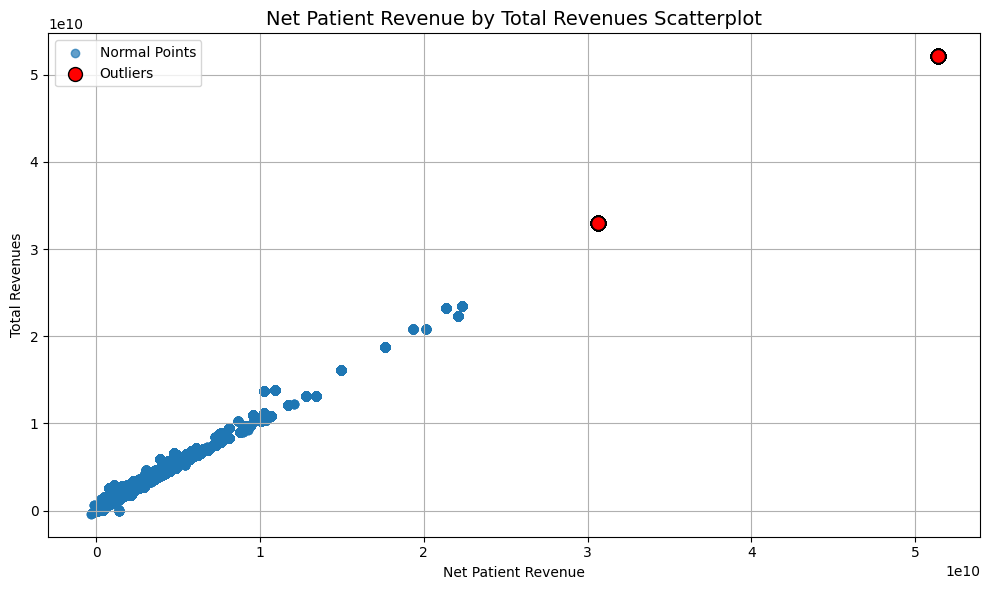

In [ ]:
# Creating a scatterplot that shows a relationship between Net Patient Revenue and Total Revenues

# Step 1: Detect outliers using Z-scores
z_scores = healthcare_data[['Net Patient Revenue', 'Total Revenues']].apply(zscore)  # Compute Z-scores
outliers = (np.abs(z_scores) > 3).any(axis=1)  # Identify rows where any column's Z-score > 3

# Step 2: Create the scatterplot
plt.figure(figsize=(10, 6))

# Plot non-outliers
plt.scatter(
    healthcare_data.loc[~outliers, 'Net Patient Revenue'],
    healthcare_data.loc[~outliers, 'Total Revenues'],
    label='Normal Points', alpha=0.7
)

# Plot outliers
plt.scatter(
    healthcare_data.loc[outliers, 'Net Patient Revenue'],
    healthcare_data.loc[outliers, 'Total Revenues'],
    color='red', label='Outliers', edgecolor='black', s=100
)

# Step 3: Customize the plot
plt.xlabel('Net Patient Revenue')
plt.ylabel('Total Revenues')
plt.title('Net Patient Revenue by Total Revenues Scatterplot', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Data Discovery

In [ ]:
#ExecutivePerHosp = healthcare_data.groupby('Hospital Name')['Executive Name'].count()

#print(ExecutivePerHosp.head(5))

#Group by 'Hospital Name' and count the occurrences of 'Executive Name'
ExecutivePerHosp = healthcare_data.groupby('Hospital Name')['Executive Name'].count()

# Sort the results in descending order and select the top 5
top_5_executives = ExecutivePerHosp.sort_values(ascending=False).head(5)

# Print the top 5 results
print("Top 5 hospitals with the most executives:")
print(top_5_executives)

Top 5 hospitals with the most executives:
Hospital Name
Kaiser Permanente                                                      4818
OptumCare                                                              4044
Department of Veterans Affairs (AKA Veterans Health Administration)    3324
HCA Healthcare (FKA Hospital Corporation of America)                   2819
Mayo Clinic                                                            1575
Name: Executive Name, dtype: int64


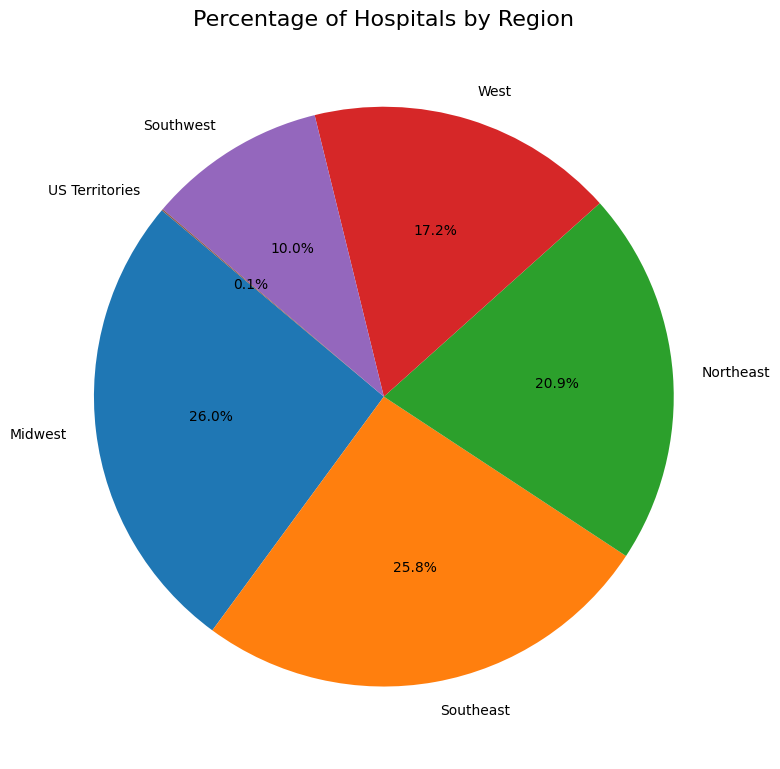

In [ ]:
# Creating a pie chart that shows distribution of hospitals across different region

# Step 1: Aggregate the data by regions to count hospitals
region_distribution = healthcare_data['Region'].value_counts()

# Step 2: Pie Chart Visualization
plt.figure(figsize=(8, 8))
region_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Percentage of Hospitals by Region', fontsize=16)
plt.ylabel('')  # Removes default y-label
plt.tight_layout()
plt.show()